In [188]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from textblob import TextBlob

In [187]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_csv('result.csv')

In [14]:
df.head()

,likeCount,commentCount,postDate,viewCount,Posts
0,2,0,41m,15.0,"“Okay Google, Parlez avec Trivia de Ghana”\n\n..."
1,12,1,2d,717.0,Special congrats to Raymond Okyere-Forson on y...
2,19,4,3d,1360.0,La version française des proverbes africains s...
3,7,2,4d,227.0,NaN
4,75,2,4d,5741.0,Here are some of the great Python packages I’m...


In [15]:
df.describe()

,likeCount,commentCount,viewCount
count,690.000000,690.000000,340.000000
mean,36.144928,2.850725,3651.661765
std,147.379950,6.814101,33669.227914
min,0.000000,0.000000,15.000000
25%,4.000000,0.000000,444.500000
50%,11.000000,1.000000,809.000000
75%,32.000000,3.000000,1797.250000
max,3536.000000,87.000000,619560.000000


In [16]:
df['likeCount'].sum()

24940

In [17]:
df['likeCount'].sum()/690

36.14492753623188

In [18]:
df['commentCount'].sum()

1967

In [19]:
df['commentCount'].sum()/690

2.8507246376811595

In [20]:
df['viewCount'].sum()

1241565.0

In [21]:
df['viewCount'].sum()/690

1799.3695652173913

In [22]:
import nltk
import gensim

In [23]:
words = df.Posts.tolist()

In [ ]:
words

In [76]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'the','https', 'hashtag', 'check', 'one', 'day', 'really', 'even', 'take','lot', 'nan','take','want' 'take',])

In [26]:
def sent_to_words(words):
    for sentence in words:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

In [27]:
data_words = list(sent_to_words(words))
print(data_words[:1])

[['okay', 'google', 'parlez', 'avec', 'trivia', 'de', 'ghana', 'vous', 'pouvez', 'essayer', 'trivia', 'de', 'ghana', 'sur', 'vos', 'appareils', 'google', 'home', 'android', 'et', 'ios', 'chatbots', 'culturexai']]


In [32]:
list_words = []
for i in data_words:
    for j in i:
        list_words.append(j)

In [34]:
print(len(list_words))

56369


In [77]:
count_each_word = Counter(list_words)
print(count_each_word.most_common(100))

[('learning', 450), ('google', 259), ('data', 257), ('lnkd', 252), ('course', 247), ('python', 240), ('like', 170), ('daysoflearning', 165), ('think', 157), ('people', 157), ('bit', 157), ('cloud', 145), ('ly', 144), ('courses', 141), ('know', 138), ('great', 137), ('science', 133), ('linkedin', 130), ('coursera', 129), ('tim', 124), ('work', 122), ('time', 121), ('nan', 118), ('learn', 118), ('lot', 118), ('first', 112), ('ai', 112), ('would', 106), ('college', 106), ('technology', 103), ('get', 102), ('things', 102), ('got', 102), ('love', 98), ('online', 88), ('resources', 87), ('way', 86), ('always', 85), ('new', 84), ('take', 79), ('want', 78), ('machine', 77), ('much', 77), ('platform', 76), ('using', 75), ('interested', 74), ('used', 73), ('could', 73), ('read', 71), ('try', 71), ('might', 68), ('assistant', 67), ('year', 67), ('opportunity', 67), ('students', 66), ('free', 66), ('book', 66), ('best', 64), ('see', 61), ('found', 60), ('everyone', 60), ('good', 59), ('future', 59

In [78]:
for token in list_words:
    if token in stop_words:
         list_words.remove(token)

In [79]:
len(list_words)

30569

In [80]:
freq = nltk.FreqDist(list_words)

In [81]:
freq

FreqDist({'learning': 450, 'google': 259, 'data': 257, 'lnkd': 252, 'course': 247, 'python': 240, 'like': 170, 'daysoflearning': 165, 'think': 157, 'people': 157, ...})

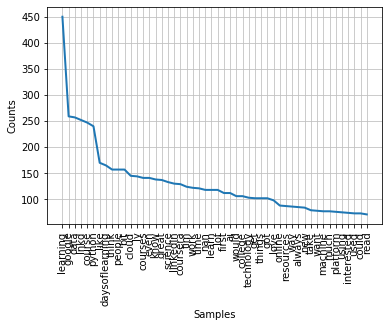

In [66]:
freq.plot(50, cumulative=False)

In [143]:
mask = np.array(Image.open(("./1.png")))

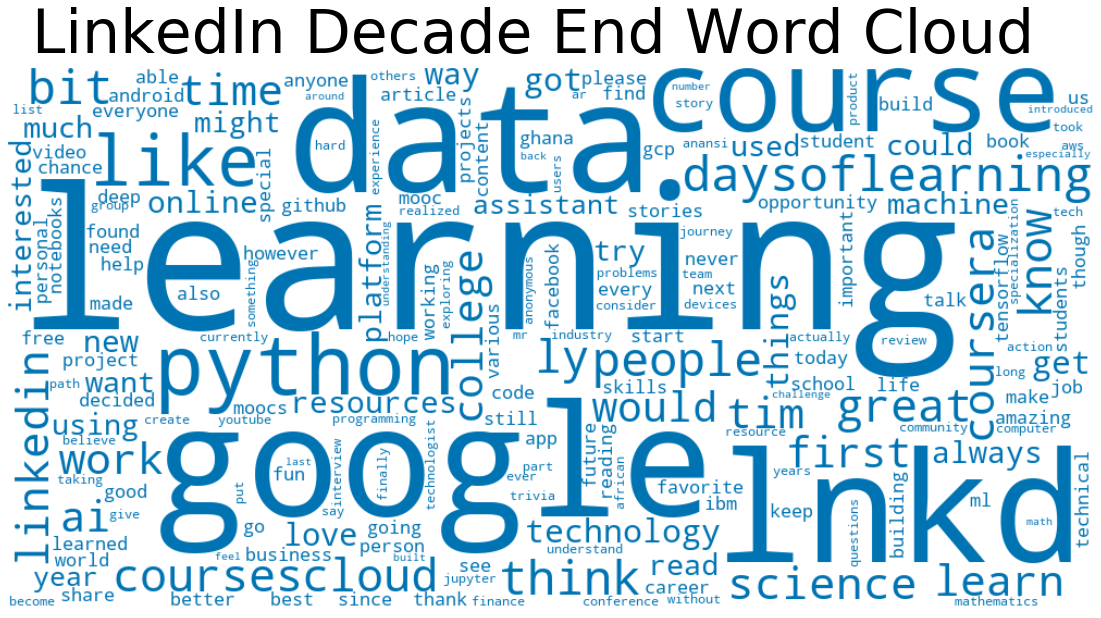

In [185]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(201, 100%, 35%)"



word_could_dict=Counter(list_words)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white', colormap=None).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"LinkedIn Decade End Word Cloud",  fontsize=60, ha='center', color='black')
image_colors = ImageColorGenerator(mask)
#plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [189]:
df['Posts'] = df['Posts'].astype(str)

df['Sentiment Analysis'] = df['Posts'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [191]:
df.head()

,likeCount,commentCount,postDate,viewCount,Posts,Sentiment Analysis
0,2,0,41m,15.0,"“Okay Google, Parlez avec Trivia de Ghana”\n\n...",positive
1,12,1,2d,717.0,Special congrats to Raymond Okyere-Forson on y...,positive
2,19,4,3d,1360.0,La version française des proverbes africains s...,neutral
3,7,2,4d,227.0,nan,neutral
4,75,2,4d,5741.0,Here are some of the great Python packages I’m...,positive


In [194]:
df.groupby('Sentiment Analysis').count()

,likeCount,commentCount,postDate,viewCount,Posts
Sentiment Analysis,,,,,
negative,24,24,24,12,24
neutral,199,199,199,106,199
positive,467,467,467,222,467


In [217]:
df2 = df.groupby('postDate').sum()

In [218]:
df2.head(10)

,likeCount,commentCount,viewCount
postDate,,,
10mo,2922,315,39090.0
11mo,2141,184,0.0
12mo,592,47,0.0
13mo,742,24,0.0
14mo,547,48,0.0
15mo,585,39,0.0
16mo,239,21,0.0
17mo,324,25,0.0
18mo,72,3,0.0


In [219]:
df2.index

Index(['10mo', '11mo', '12mo', '13mo', '14mo', '15mo', '16mo', '17mo', '18mo',
       '19mo', '1mo', '1w', '20mo', '21mo', '22mo', '23mo', '24mo', '25mo',
       '2d', '2mo', '2w', '3d', '3mo', '3w', '41m', '4d', '4mo', '5d', '5mo',
       '6d', '6mo', '7mo', '8mo', '9mo'],
      dtype='object', name='postDate')

In [207]:
df.groupby('postDate').count().head()

,likeCount,commentCount,viewCount,Posts,Sentiment Analysis
postDate,,,,,
10mo,101,101,26,101,101
11mo,39,39,0,39,39
12mo,15,15,0,15,15
13mo,18,18,0,18,18
14mo,18,18,0,18,18


In [233]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df2.index,
                y=df2['likeCount'],
                name="likeCount",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df2.index,
                y=df2['commentCount'],
                name="commentCount",
                line_color='dimgray',
                opacity=0.8))

fig.update_layout(title_text="Decade End LinkedIn Charts Likes + Comments")
fig.show()

In [235]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
                x=df2.index,
                y=df2['viewCount'],
                name="viewCount",
                line_color='red',
                opacity=0.8))

fig2.update_layout(title_text="Decade End LinkedIn Charts Views")
fig2.show()

In [240]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df.index,
                y=df['likeCount'],
                name="likeCount",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df.index,
                y=df['commentCount'],
                name="commentCount",
                line_color='dimgray',
                opacity=0.8))

fig.update_layout(title_text="Decade End LinkedIn Charts Likes + Comments")
fig.show()

In [241]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
                x=df.index,
                y=df['viewCount'],
                name="viewCount",
                line_color='red',
                opacity=0.8))

fig2.update_layout(title_text="Decade End LinkedIn Charts Views")
fig2.show()

In [243]:
fig = px.scatter(df, x=df.index, y=df["likeCount"], color=df["Sentiment Analysis"])
fig.show()

In [244]:
fig = px.scatter(df, x=df.index, y=df["commentCount"], color=df["Sentiment Analysis"])
fig.show()

In [245]:
fig = px.scatter(df, x=df.index, y=df["viewCount"], color=df["Sentiment Analysis"])
fig.show()

In [267]:
df3 = df.groupby('Sentiment Analysis').count()
fig = px.bar(df3, x= df3.index, y=df3['likeCount'], color=df3['likeCount'], barmode='group',
             height=400)
fig.show()

In [270]:
df3 = df.groupby('Sentiment Analysis').sum()

In [250]:
df3

,likeCount,commentCount,viewCount
Sentiment Analysis,,,
negative,1416,104,47195.0
neutral,6592,322,706134.0
positive,16932,1541,488236.0


In [252]:
fig = px.bar(df3, x= df3.index, y=df3['likeCount'], color=df3.index, barmode='group',
             height=400)
fig.show()

In [253]:
fig = px.bar(df3, x= df3.index, y=df3['commentCount'], color=df3.index, barmode='group',
             height=400)
fig.show()

In [254]:
fig = px.bar(df3, x= df3.index, y=df3['viewCount'], color=df3.index, barmode='group',
             height=400)
fig.show()

In [269]:
fig = px.pie(df3, values='likeCount', names=df3.index, title='Sentiment Analysis Total Count')
fig.show()

In [272]:
fig = px.pie(df3, values='likeCount', names=df3.index, title='Sentiment Analysis Likes Count')
fig.show()

In [273]:
fig = px.pie(df3, values='commentCount', names=df3.index, title='Sentiment Analysis Comment Count')
fig.show()

In [274]:
fig = px.pie(df3, values='viewCount', names=df3.index, title='Sentiment Analysis View Count')
fig.show()

In [291]:
df4 = pd.read_csv("followers.csv")

In [298]:
df4.describe()

,followers
count,5785.000000
mean,4151.775454
std,7925.516260
min,0.000000
25%,598.000000
50%,1265.000000
75%,4105.000000
max,331729.000000


In [281]:
df4.head(4)

,profileLink,firstName,lastName,occupation,followers
0,https://linkedin.com/in/anitaelberse,Anita,Elberse,Harvard Business School Professor,331729
1,https://linkedin.com/in/nabihbawazir,NABIH IBRAHIM,BAWAZIR,115K Followers| Linkedin Spotlight Indonesia 2...,115078
2,https://linkedin.com/in/timsalau,Tim,Salau,Mr. Future of Work ~ mrfutureofwork.com,66842
3,https://linkedin.com/in/asif-bhat,Asif,Bhat,✅Data Analyst✅SAP BI ✅YellowFin BI ✅OCJP ✅ITIL...,56145


In [295]:
total = df4['followers'].astype(int).sum()

In [296]:
total

24018021

In [299]:
total/5785

4151.775453759724